<div align="center">
    <h1> My Machine Learning Journey</h1>
Civil Engineer · Researcher . Youtuber · Machine Learning Engineer (The Goal)
    <br>
    Sharing and documenting my progress and journey as I learn machine learning
     <br>
</div>

<br>

<div align="center">
    <a target="_blank" href="https://github.com/barbaraaboagye/My-MachineLearning-Journey"><img src="https://img.shields.io/github/last-commit/barbaraaboagye/My-MachineLearning-Journey"></a>&nbsp;
      <a target="_blank" href="https://www.youtube.com/channel/UCEYKFq7ZEg81GYxpzNqYZ4)"><img src="https://img.shields.io/youtube/channel/subscribers/UCEYKFq7ZEg81GYxpzNqYZ4Q?style=social"></a>&nbsp;
    <a target="_blank" href="https://fr.linkedin.com/in/barbara-aboagye-233ba8133"><img src="https://img.shields.io/badge/style--5eba00.svg?label=LinkedIn&logo=linkedin&style=social"></a>&nbsp;
    <a target="_blank" href="https://twitter.com/awesome_ama"><img src="https://img.shields.io/twitter/follow/awesome_ama?style=social"></a>
    <br>
</div>

<br>

# Resume Scanner / Screening using NLP

**Date : 27th August, 2023**
 <br>


# Resources used : 

- [Dataset]()
- [Resume Screening with Natural Language Processing, Use cases and Code Explained](https://www.youtube.com/watch?v=eaVMgs9KkQc&t=1021s)
- [Build a Powerful Resume Screening App with Python | Resume Analyser Application using NLP Python](https://www.youtube.com/watch?v=hG8K5h2J-5g&t=3044s)

<br>

Handwritten notes can be found [here][def]

[def]: Put link here

### Plan of Action 



- [x] Data collection
- [x ] Exploratory data analysis (EDA)
- [x] Preprocessing : Data cleaning and data encoding
- [x ] Feature extraction
- [ ] Training a classifier
- [ ] Validation and testing
- [ ] Job description matching
- [ ] Ranking and sorting


### 1. Import library

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
#from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder


[nltk_data] Downloading package stopwords to /Users/ama/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ModuleNotFoundError: No module named 'wordcloud'

In [12]:
df = pd.read_csv("UpdatedResumeDataSet.csv")
df.head()
#df.info()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [13]:

civil_enginer = df[df["Category"] == "Civil Engineer"]
#civil_enginer

df["Resume"][295]

"Education Details \r\n B.E in Civil Engineering Civil Engineering Chennai, Tamil Nadu Anna University\r\nQA/QC Civil Engineer \r\n\r\nQA/QC Civil Engineer\r\nSkill Details \r\nCompany Details \r\ncompany - Ray Engineering Limited\r\ndescription - Mumbai, India.\r\nConsultancy: Jacobs Engineering India Limits. (United States Company)\r\nClient: Glaxo Smith Kline (GSK), Nashik, India.\r\nPosition: QA/QC Civil Engineer.\r\n\r\nProject Summary:\r\nGlaxo Smith Kline (GSK) is British multinational pharmaceutical Company in India. USD 150 million Building project of GSK.\r\nThe Project involving in Medicine Manufacturing plant, Effluent Treatment plant\r\n(ETP), Effluent Drain line and storm water line.\r\n\r\nDuties & Responsibilities:\r\n\r\nâ\x80¢\tAll site inspection shall be carried out vise an official Inspection and Test Request\r\n(ITR) submitted by the Contractor through the proper channels\r\nâ\x80¢\tDevelop method statement for the activity including risk assessment and job safety

### 2. Exploratory data analysis

In [14]:
category = df['Category'].value_counts().reset_index()


Text(0.5, 1.0, 'Category Development')

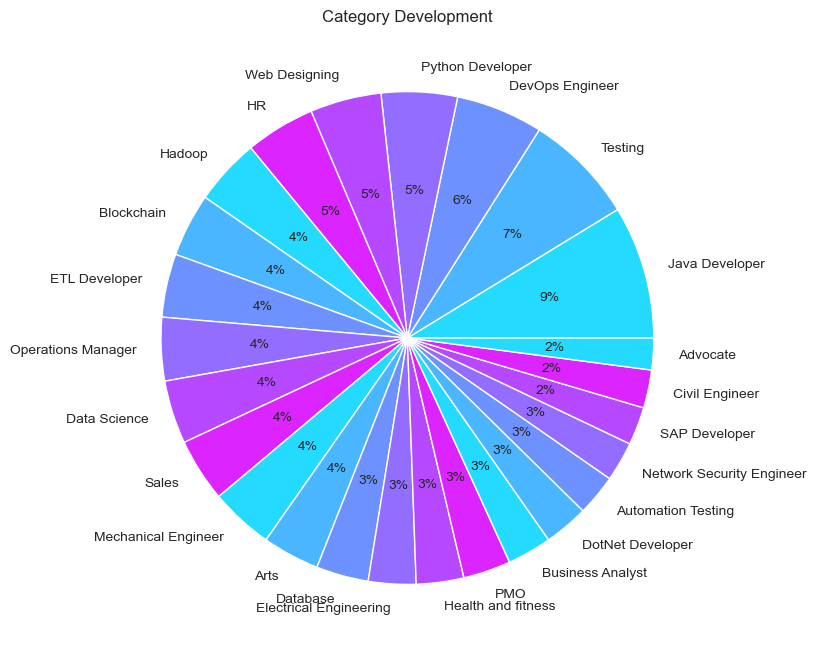

In [15]:
plt.figure(figsize= (12,8))
plt.pie(category["Category"], labels = category["index"], colors = sns.color_palette('cool'), autopct= '%.0f%%')
plt.title("Category Development")


In [16]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


### 3. Pre processing  

Clean data :
- URLs
- hashtags
- mentions
- special letters
- punctuations

CODE : 
So, if you use `re.sub('http\S+\s', '', text)`, it will find and remove any substrings that start with "http", followed by any sequence of non-whitespace characters, and ending with a whitespace character (like a space or newline) in the `text string`

In [17]:
def cleanResume(text) :
    cleanText = re.sub('http\S+\s', ' ',text) #remove urls
    cleanText = re.sub('RT|cc', ' ', cleanText) # remove RT and cc
    cleanText = re.sub("#/S+", " ",cleanText) #remove hastags
    cleanText = re.sub("@/S+", " ", cleanText) #remove mentions
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText) #remove punctuations
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) #remove non ASCII characters
    cleanText = re.sub('\s+', ' ', cleanText) #remove space
    return cleanText

cleanResume("my name is #### $ #  #: >< and you can find me on  this website http://heloword and send an email to @gmain.com. Follow me on twitter : @awesome_ama")

'my name is and you can find me on this website and send an email to gmain com Follow me on twitter awesome ama'

In [18]:
df["Cleaned_Resume"] = df["Resume"].apply(lambda x :cleanResume(x))
df.head()

,Category,Resume,Cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


`df["Resume"].apply(lambda x: cleanResume(x))`: This applies the `cleanResume()` function to each element in the "Resume" column of the DataFrame. The `lambda x` is used to define an anonymous function that takes each element of the "Resume" column as input (x) and applies the `cleanResume()` function to it.

In [19]:
df['Cleaned_Resume'][295]

'Education Details B E in Civil Engineering Civil Engineering Chennai Tamil Nadu Anna University QA QC Civil Engineer QA QC Civil Engineer Skill Details Company Details company Ray Engineering Limited description Mumbai India Consultancy Jacobs Engineering India Limits United States Company Client Glaxo Smith Kline GSK Nashik India Position QA QC Civil Engineer Project Summary Glaxo Smith Kline GSK is British multinational pharmaceutical Company in India USD 150 million Building project of GSK The Project involving in Medicine Manufacturing plant Effluent Treatment plant ETP Effluent Drain line and storm water line Duties Responsibilities All site inspection shall be carried out vise an official Inspection and Test Request ITR submitted by the Contractor through the proper channels Develop method statement for the activity including risk assessment and job safety environmental analysis and Inspection Test Plan and Checklist based on specifications of the project Taking care of QA QC do

In [20]:
#getting the entire resume text
corpus=" "
for i in range(0,len(df)):
    corpus= corpus+ df["Cleaned_Resume"][i]

## I don't know or understand the purpose of this. I know now. Put all the text into a single string called scopus. Then after it is tokenized

In [21]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
#Tokenizing the text
tokens = tokenizer.tokenize(corpus)
len(tokens)

#tokenizing the words. There are certain technical terms that are togther example bigdata is one word so has one toke. IN English big data may be considered as two words

412023

In [22]:
## making everything lower case
words = [ ]
for word in tokens :
    words.append(word.lower())

words[0:7]

['skills', 'programming', 'languages', 'python', 'pandas', 'numpy', 'scipy']

In [23]:
## Encoding the data

label = LabelEncoder()
df["new_category"] = label.fit_transform(df["Category"])


#df["new_category"].unique()
df.head()

,Category,Resume,Cleaned_Resume,new_category
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,6


In [24]:
#df["new_category"].unique()
#array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
 #      17, 19,  7, 13, 10,  9,  3, 23])
# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

In [25]:
df.shape

(962, 4)

### Vectorisation

Vectorization refers to the process of converting text data into numerical representations that machine learning algorithms can understand and process. There are different techniques for vectorizing text data, and the choice of method depends on the specific task and the characteristics of the data. Some common methods for vectorizing text data in NLP include :
- Bag-of-Words (BoW)
- Term Frequency-Inverse Document Frequency (TF-IDF)
- Word Embeddings
- Character-level Vectorization
- Subword Embeddings
- Document Embeddings

In [26]:
## vectorizing the cleaned resume

text = df['Cleaned_Resume'].values
target = df['new_category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(text)
WordFeatures = word_vectorizer.transform(text)

WordFeatures.shape



(962, 1500)

### 3. Train Test Data and Modeling

In [27]:
# Separate train and test data

x_train, x_test, y_train, y_test = train_test_split(WordFeatures,target,random_state = 24,test_size = 0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((769, 1500), (193, 1500), (769,), (193,))

In [28]:
# Model Training

model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(x_train, y_train)
OneVsRestClassifier(estimator=KNeighborsClassifier())

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [29]:
# Prediction

y_pred = model.predict(x_test)



In [30]:
print(f' Training Accuracy  :  {(model.score(x_train, y_train)*100).round(2)} %  ')
print(f' Validation Accuracy  :  {(model.score(x_test, y_test)*100).round(2)} % ')

 Training Accuracy  :  98.96 %  
 Validation Accuracy  :  96.89 % 


### 4 To learn top keywords to analyse

In [31]:
#Stop words are generally the most common words in a language.

stopwords = nltk.corpus.stopwords.words('english') # Load English stop words from NLTK. These words include and, the ,etc
words_new = []

#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in stopwords
for word in words:
    if word not in stopwords:
        words_new.append(word)

In [32]:

  import nltk
  nltk.download('omw-1.4')
     

[nltk_data] Downloading package omw-1.4 to /Users/ama/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Lemmatization
Lemmatization is the process of reducing words to their base or dictionary form (called "lemmas"), often to normalize words and reduce inflected forms to a common base. Example you have this variable words_new = ["running", "better", "cats", "books"]. After performing lemmatization using the NLTK WordNet Lemmatizer, the lem_words list could look like this: lem_words = ["run", "better", "cat", "book"]


In [33]:
# Perform Lemmatization
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet') # Download WordNet data if not already downloaded

wn = WordNetLemmatizer() 
lem_words=[]
for word in words_new:
    word=wn.lemmatize(word)
    lem_words.append(word)

[nltk_data] Downloading package wordnet to /Users/ama/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [35]:
lem_words[0:10]

['skill',
 'programming',
 'language',
 'python',
 'panda',
 'numpy',
 'scipy',
 'scikit',
 'learn',
 'matplotlib']

In [34]:
same=0
diff=0
for i in range(0,1832):
    if(lem_words[i]==words_new[i]):
        same=same+1
    elif(lem_words[i]!=words_new[i]):
        diff=diff+1
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 294
Number of words not Lemmatized= 1538


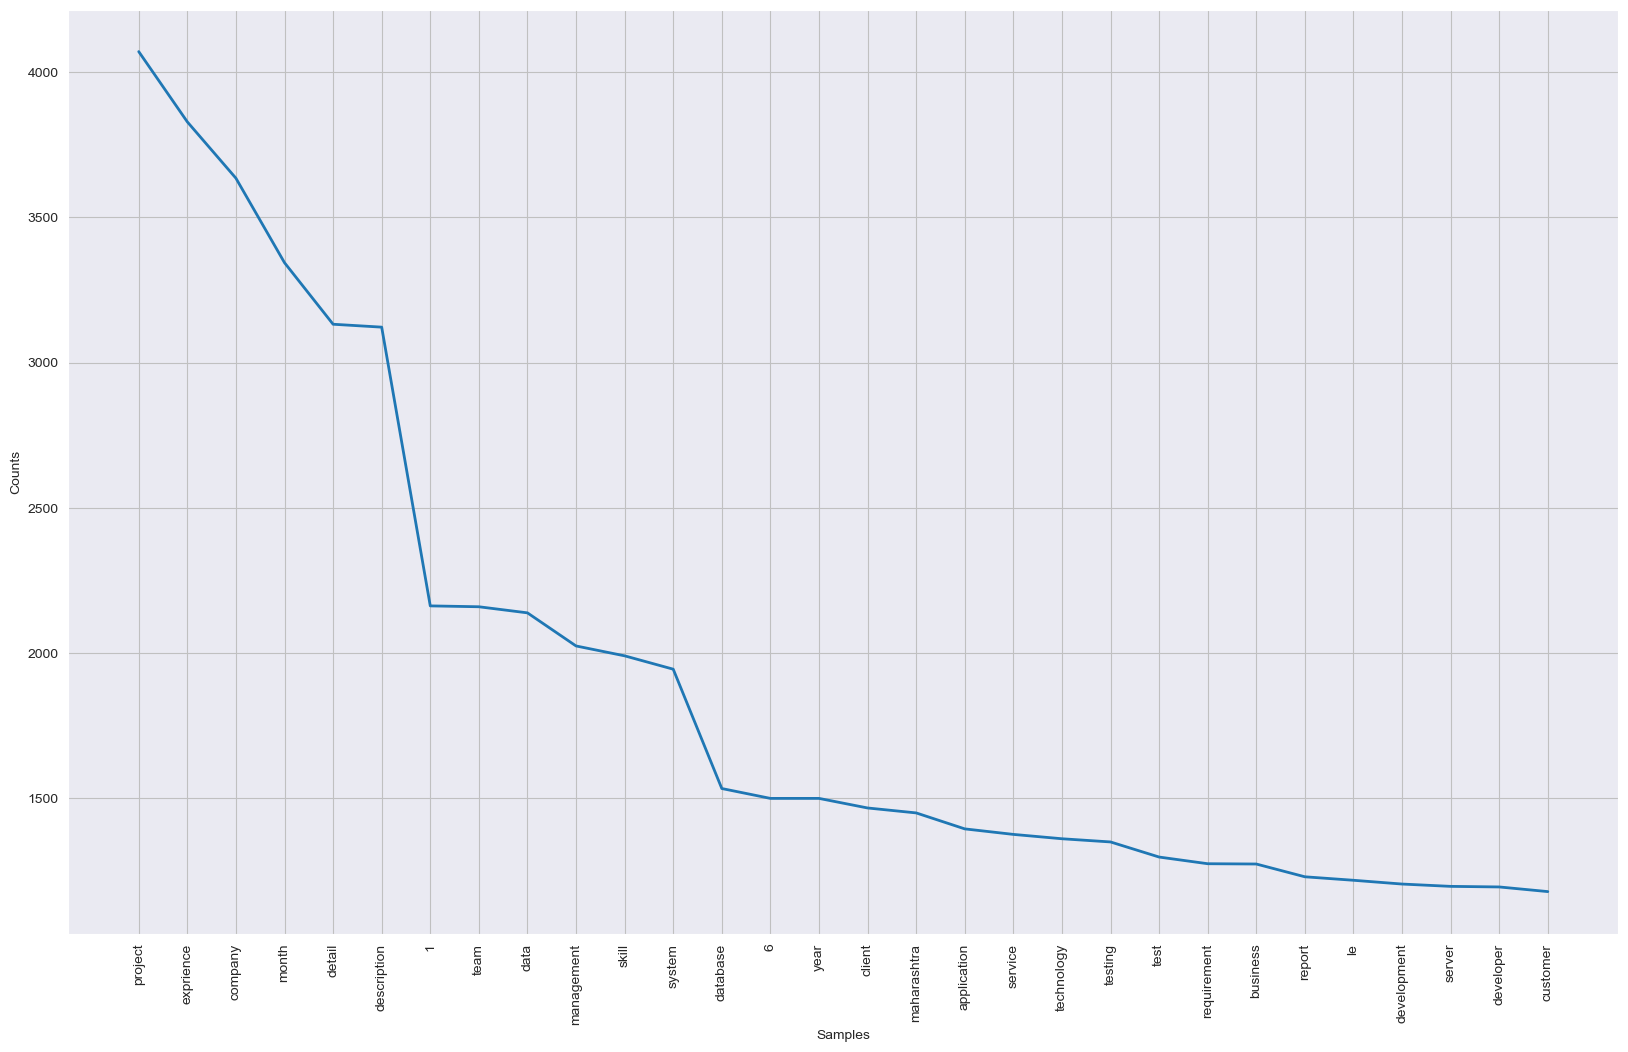

<Axes: xlabel='Samples', ylabel='Counts'>

In [36]:

#The frequency distribution of the words
freq_dist = nltk.FreqDist(lem_words)
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
freq_dist.plot(30)
     

In [38]:

# Now we generate wordcloud
res=' '.join([i for i in lem_words if not i.isdigit()])

In [43]:
pip install wordcloud


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 6.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


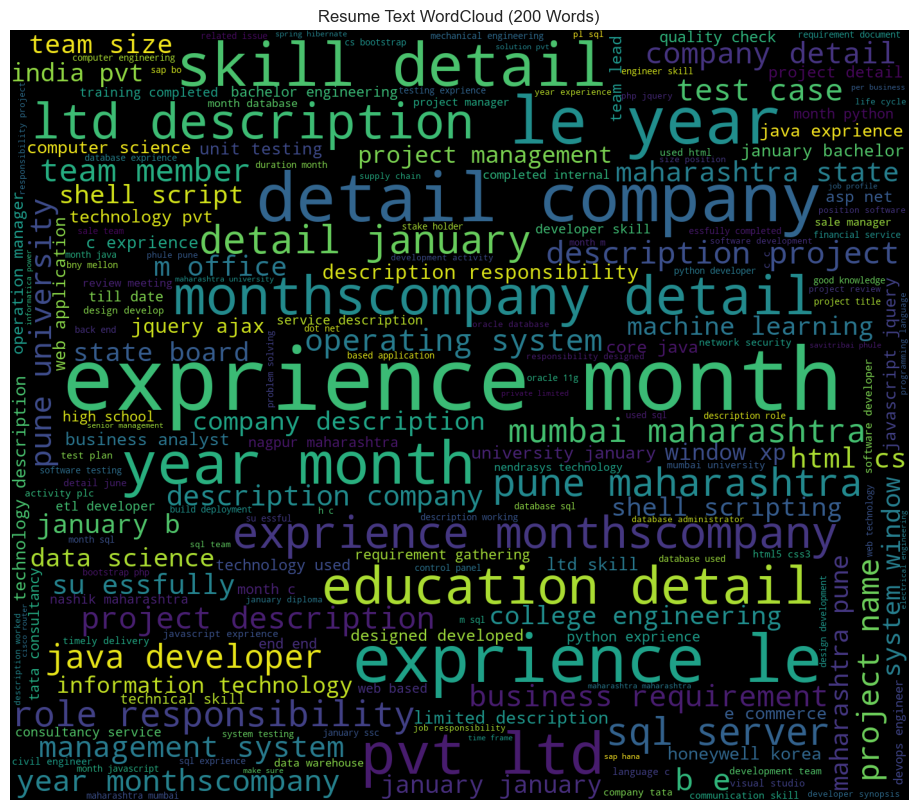

In [44]:
from wordcloud import WordCloud

plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=200,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (200 Words)')
plt.axis('off')
plt.show()